#### Overview

Implementing convolution from scratch to get a hands-on experience of how it works. You will be implementing the following functions from scratch:
- Zero padding
- Convolution operation

Further details of the tasks are provided below.

In [1]:
# making all the necessary imports here
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob 
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
from scipy.spatial import distance
from math import sqrt
from google.colab import drive


#### Zero-Padding

Zero-padding adds zeros around the border of an image:

The main benefits of padding are the following:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer. 

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.


Implement the <code>zero_pad</code> function which will pad the image. Use <code>np.pad</code> to do this (Look up the documentation to figure out the arguments for padding)

In [ ]:
def zero_pad(X, pad):
    """
    Arguments:
    X -- python numpy array of shape (n_H, n_W) representing a an image
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    """
    X_pad = None

    ### Code Here ###
    X_pad = np.pad(X, pad_width = pad);
    #################
    return X_pad

Shape of x_pad:  (7, 7)


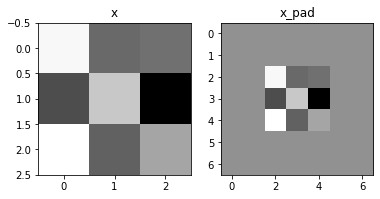

In [ ]:
# visualizing the zero_pad's function's output
np.random.seed(1)
x = np.random.randn(3, 3)
#print(x)
x_pad = zero_pad(x, 2)
print("Shape of x_pad: ", x_pad.shape)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x,cmap='gray')
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad,cmap='gray')

#### 2D Convolution

2D covolution is the process of applying a filter to an image. Implementing the <code>conv2D</code> function that will be used to build a convolutional unit which:

- Takes an input image 
- Applies a filter keeping as per padding and stride parameters 
- Outputs another image (usually, but not necessarily, of different size)

In [ ]:
def conv2D(inp, F, pad, stride):
    """
    Arguments:
    inp -- output activations of the previous layer (can also be conceptualized as the input image), numpy array of shape (n_H, n_W)
    F -- Filter, numpy array of shape (f, f)
    pad -- integer
    stride -- integer
    """
  
    conv_output = None
    ### Code Here ###
    # !check what flip kernal means & purpose 
    F = np.flipud(np.fliplr(F)) #flip filter kernal
    n_H = inp.shape[0]
    n_W = inp.shape[1]
    f = F.shape[0]   
    output_size_x = ((n_H - f + 2*pad)// stride) + 1     #output matrix size 
    output_size_y = ((n_W - f + 2*pad)// stride) + 1   #separate cause n_H and n_W may be different 
    conv_output = np.zeros((output_size_x, output_size_y))
    #zero pad image  
    inp = zero_pad(inp, pad)
   # print("inp: ", inp)
    #start multiplying. move f units in x, f units in y. 
    for y in range(inp.shape[1]): #image.shape has two var for x and y. (x,y). 
      if y > (inp.shape[1] - f ): #end of image. 
        break
      if y % stride == 0: #start convolving
        for x in range(inp.shape[0]): #move in x direction 
          if x > (inp.shape[0] - f):
            break 
          try:
        #  print( "here")

            if x % stride == 0:  
                new_inp = inp[x: x + f, y: y + f] #take out a small portion of size (f,f) from image. 
              # print("new_inp: ", new_inp) 
                conv_output[x][y] = (F * new_inp.transpose()).sum()  #element wise multiplication + addition. 
          except: 
              break

    
    
    #################

    return conv_output

#### Filter Banks

You have come across many different kinds of filters and various examples of them in the lectures. In the rest of the notebook, you will be experimenting with some of them. Some questions may require you to come up with your own filters as well

##### Reading Image(s)
You are required to do the following tasks:
- Use the above imported libraries to <b>read and display</b> image(s) provided to you with PA1's part A's "Images" folder. 
- You are required to apply various pre-processing techniques on the read image(s) to prepare them for edge detection tasks. This should be done keeping in mind that the task is of edge detection and not color detection
- Use the above imported libraries to <b>read and display</b> image provided to you with PA1's part A's "Target_Image" folder.

In [ ]:
# read all the provided images "Images" folder in a list here

input_images = None

# ### Code Here ###
drive.mount('/drive', force_remount=True)
input_images = [cv2.imread(file) for file in glob.glob("/drive/MyDrive/CV_PA1/Images/*.png")]
len(input_images)


#len(input_images)

#################

Mounted at /drive


5

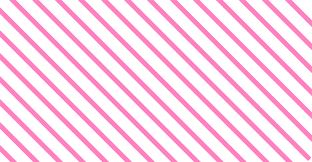

In [ ]:
# display input_images[0] here

to_show = input_images[0]

### Code Here ###
cv2_imshow(to_show)
#################

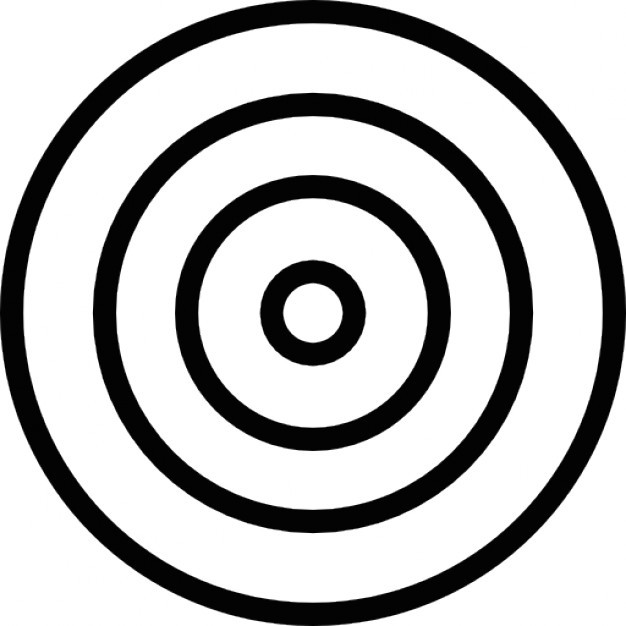

In [ ]:
# display input_images[1] here

to_show = input_images[1]

### Code Here ###

cv2_imshow(to_show)

#################

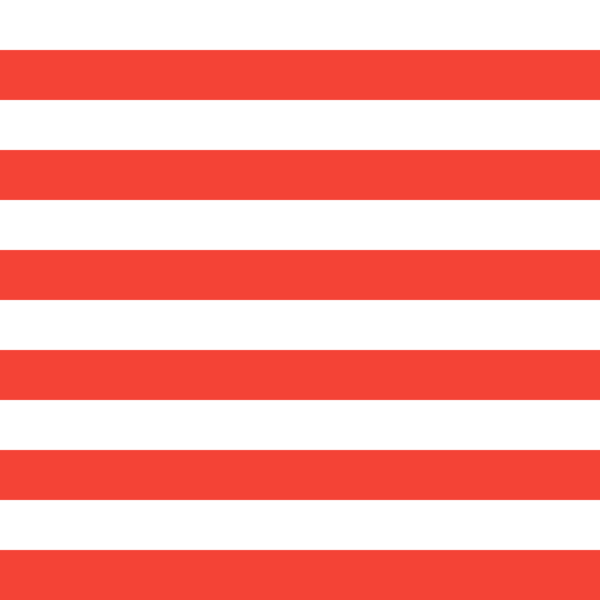

In [ ]:
# display input_images[2] here

to_show = input_images[2]

### Code Here ###

cv2_imshow(to_show)


#################

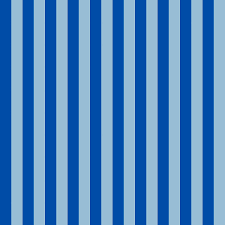

In [ ]:
# display input_images[3] here

to_show = input_images[3]

### Code Here ###

cv2_imshow(to_show)


#################

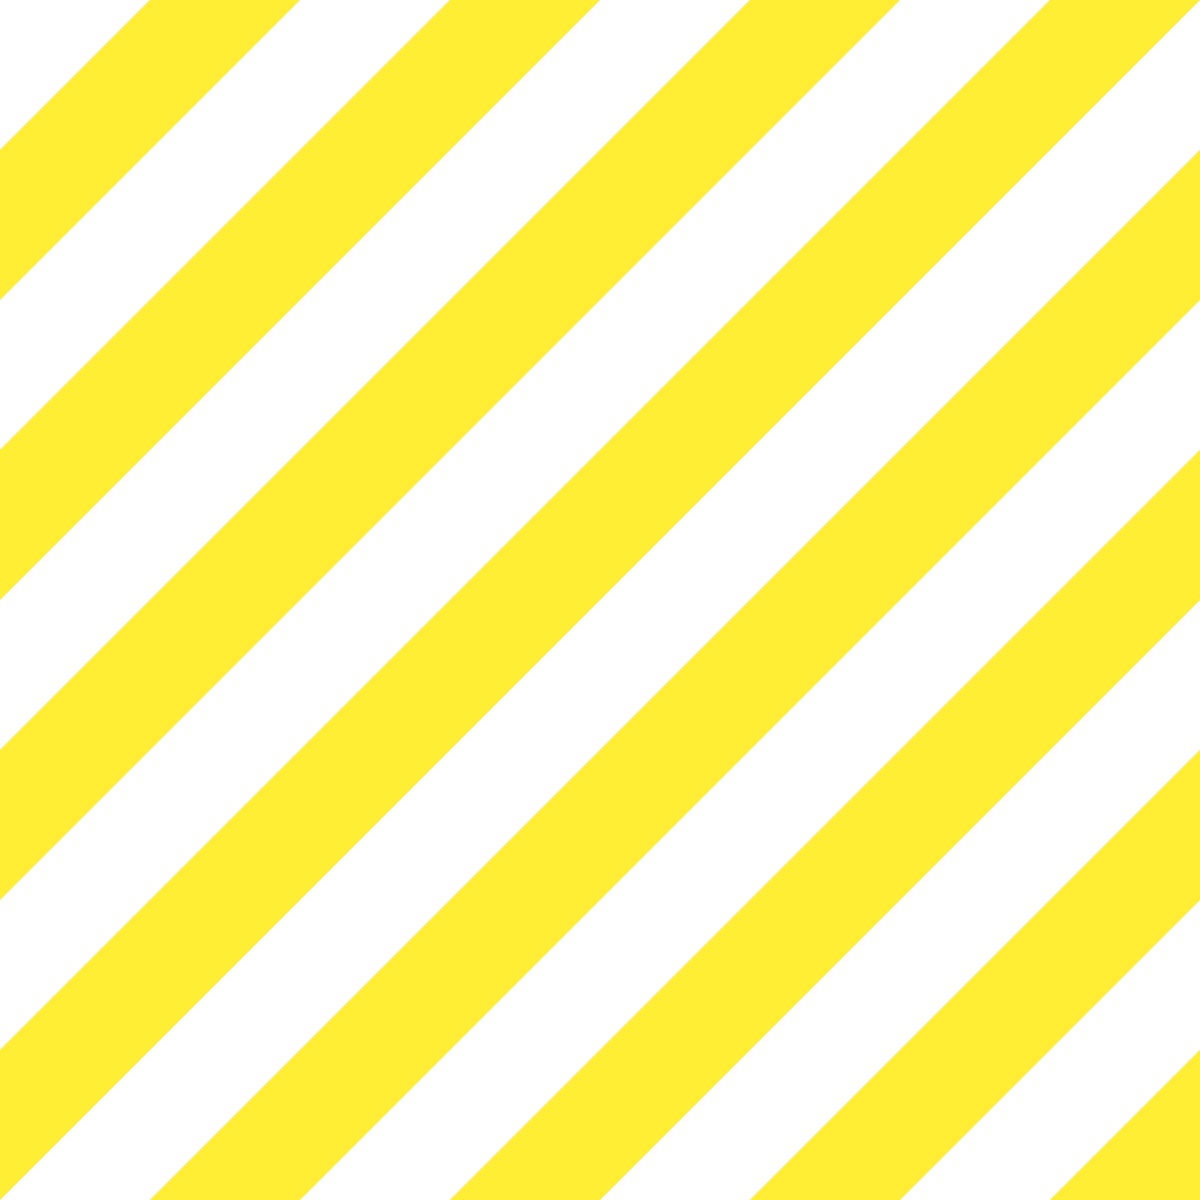

In [ ]:
# display input_images[4] here

to_show = input_images[4]

### Code Here ###

cv2_imshow(to_show)


#################

In [ ]:
# apply pre-processing on the read image(s) here


preprocessed_list_of_images = None
# or preprocessed_image = None
### Code Here ###

preprocessed_list_of_images = []        #grey scale 
for image in input_images:
  norm_image = cv2.normalize(image, image, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #normalize image 
  image = cv2.cvtColor(src=norm_image, code=cv2.COLOR_BGR2GRAY) #grey scale image. 
  image = cv2.resize(image, (227, 227))
  
  preprocessed_list_of_images.append(image)


#################

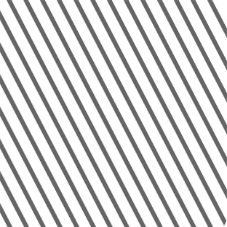

In [ ]:
# display preprocessed_list_of_images[0] here

to_show = preprocessed_list_of_images[0]

### Code Here ###

cv2_imshow( to_show )

#################

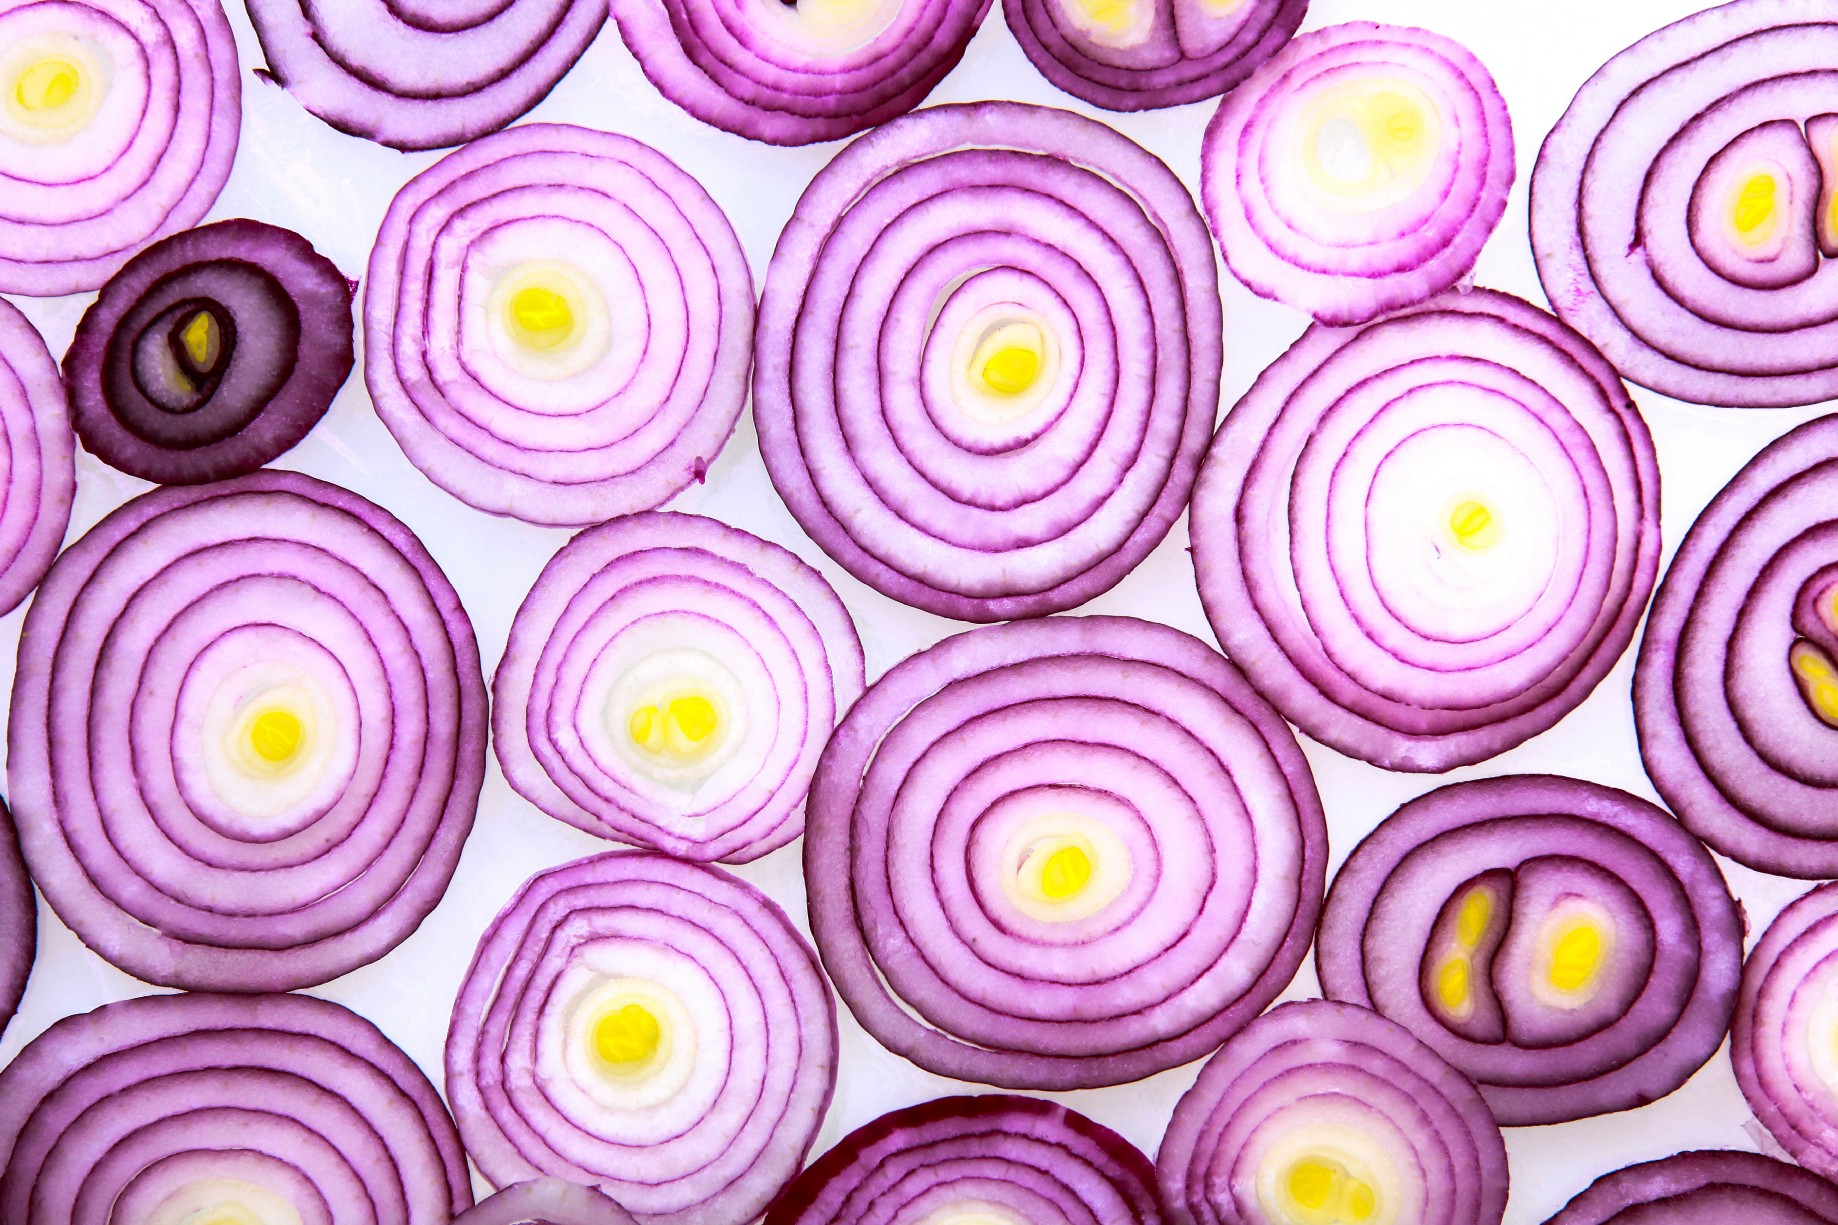

In [ ]:
# read and display the provided image from "Target_Image" folder here

target_image = None

### Code Here ###
target_image = [cv2.imread(file) for file in glob.glob("/drive/MyDrive/CV_PA1/Target_Image/*.png")] #read and store in target_image 

cv2_imshow( target_image[0])


#################

##### Edge Detection Task

In this task, you will be interacting with all the images from the "Images" folder. Study the images to see how they are laid out before starting with the following tasks:
- Make a filter that gives a "high" activation on "horizontal.png"
- Make a filter that gives a "high" activation on "vertical.png"
- Make a filter that gives a "high" activation on "circular.png"
- Make a filter that gives a "high" activation on "right_to_left_diagonal.png"
- Make a filter that gives a "high" activation on "left_to_right_diagonal.png"

<b>Note:</b> You have to apply the filter using the <code>conv2D</code> function you made earlier. You must display each filter's result. If you fail to do so, 0 marks will be awarded for that part.  


(229, 229)


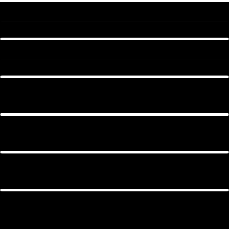

In [ ]:
# initialize and apply horizontal edge detection filter on "horizontal.png" image and display result

h_filter = None

### Code Here ###

h_filter = np.array([[1, 0, -1], 
                     [2, 0, -2], 
                     [1, 0, -1]])

# Use your Conv2D filter to get horizontal edges and display them.
#cv2_imshow(preprocessed_list_of_images[2])
resulth = conv2D(preprocessed_list_of_images[2], h_filter, 2, 1)
print(resulth.shape)
cv2_imshow(resulth)


#################

(229, 229)


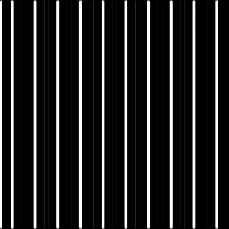

In [ ]:
# initialize and apply vertical edge detection filter on "vertical.png" image and display result

v_filter = None

### Code Here ###

v_filter = np.array([[1, 2, 1], 
                     [0, 0, 0], 
                     [-1, -2, -1]])

resultv = conv2D(preprocessed_list_of_images[3], v_filter, 2, 1)
print(resultv.shape)
cv2_imshow(resultv)

#################

(229, 229)


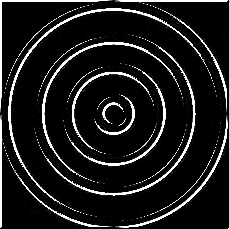

In [ ]:
# initialize and apply circular pattern's edge detection filter on "circular.png" image and display result

c_filter = None

### Code Here ###
c_filter = np.array([[4, 8, -4],
                     [8, 0, -8],
                     [-4, -8, 4]])
resultc = conv2D(preprocessed_list_of_images[1], c_filter, 2, 1)
print(resultc.shape)
cv2_imshow(resultc)


#################

(229, 229)


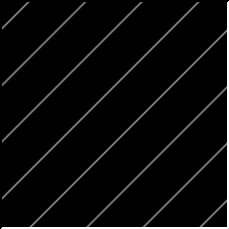

In [ ]:
# initialize and apply right-to-left diagonal edge detection filter on "right_to_left_diagonal.png" image and display result

rlDiag_filter = None

### Code Here ###
rlDiag_filter = np.array([[-1,-1 , 0], 
                          [-1, 0, 1], 
                          [0, 1, 1]]) #sobel filter

resultRl = conv2D(preprocessed_list_of_images[4], rlDiag_filter, 2, 1)
print(resultRl.shape)
cv2_imshow(resultRl)



#################

(229, 229)


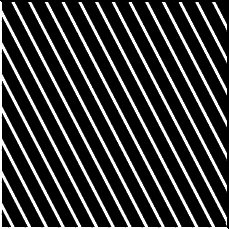

In [ ]:
# initialize and apply left-to-right diagonal edge detection filter on "right_to_left_diagonal.png" image and display result

lrDiag_filter = None

### Code Here ###

lrDiag_filter = np.array([[0, 1,  2], 
                          [-1, 0, 1], 
                          [-2, -1, 0]]) #sobel filter. 

resultlr = conv2D(preprocessed_list_of_images[0], lrDiag_filter, 2, 1)
print(resultlr.shape)
cv2_imshow(resultlr)

#################

#### Testing Your Filters Through Filter Banks

<b>Instructions:</b> In this part you will have to do the following:
- Apply all the filters made above to the target_image and store the results for each filter
- Use your results of filter application on preprocessed_list_of_images and calculate their euclidean distance from each detection in the stored results
- Analyze your results to determine the most dominant feature detected in the target_image and explain how your results show this

<b>Important (failing to follow these will result in mark's detection):</b> 
- Print the state of your variables at each stage
- Print any necessary image outputs
- Keep your code neat
- Add cells as required (DO NOT dump all the code in one cell)


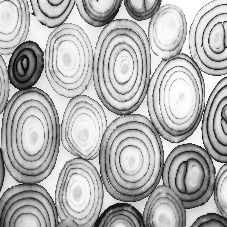

In [ ]:
  ### Code Here ###

  #pre process target image first 
  norm_image = cv2.normalize(target_image[0], image, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #normalize image 
  image = cv2.cvtColor(src=norm_image, code=cv2.COLOR_BGR2GRAY) #grey scale image. 
  target_image[0] = cv2.resize(image, (227, 227))
  cv2_imshow(target_image[0])

  ##################

(229, 229)


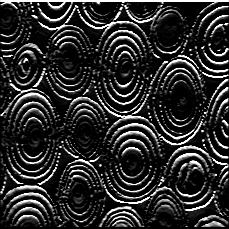

58821.92015688599


In [ ]:
#horizontal filter here
h_filter = np.array([[1, 0, -1], 
                     [2, 0, -2], 
                     [1, 0, -1]])
#cv2_imshow(target_image[0])
result_h = conv2D(target_image[0], h_filter, 2, 1)
print(result_h.shape)
cv2_imshow(result_h)

dist_h = np.dist_v = np.linalg.norm( resulth - result_h)
#dist_h = np.sqrt(dist_h)
print(dist_h)


(229, 229)


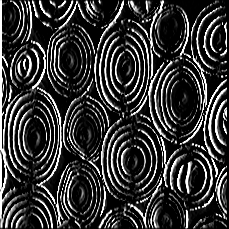

64022.68866798929


In [ ]:
v_filter = np.array([[1, 2, 1], 
                     [0, 0, 0], 
                     [-1, -2, -1]])
result_v = conv2D(target_image[0], v_filter, 2, 1)
print(result_v.shape)
cv2_imshow(result_v)

dist_v = np.linalg.norm( resultv - result_v)
print(dist_v)

(229, 229)


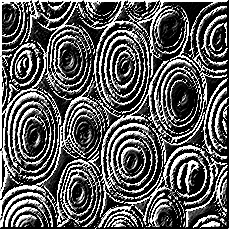

229091.33401903996


In [ ]:
c_filter = np.array([[4, 8, -4],
                     [8, 0, -8],
                     [-4, -8, 4]])
result_c = conv2D(target_image[0], c_filter, 2, 1)
print(result_c.shape)
cv2_imshow(result_c)

dist_c = np.linalg.norm( resultc - result_c)
print(dist_c)

(229, 229)


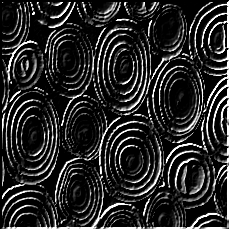

30804.637531712615


In [ ]:
rlDiag_filter = np.array([[-1,-1 , 0], 
                          [-1, 0, 1], 
                          [0, 1, 1]])
result_rlDiag = conv2D(target_image[0], rlDiag_filter, 2, 1)
print(result_rlDiag.shape)
cv2_imshow(result_rlDiag)

dist_rl = np.linalg.norm( resultRl - result_rlDiag)
print(dist_rl)

(229, 229)


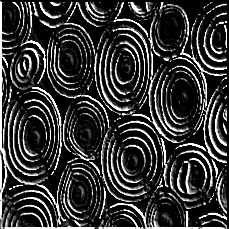

73538.95796280331


In [ ]:
lrDiag_filter = np.array([[0, 1,  2], 
                          [-1, 0, 1], 
                          [-2, -1, 0]])
result_lrDiag = conv2D(target_image[0], lrDiag_filter, 2, 1)
print(result_lrDiag.shape)
cv2_imshow(result_lrDiag)

dist_lr = np.linalg.norm( resultlr - result_lrDiag)
print(dist_lr)


#### Explain Your Results Here: 
  Eucledian Distances for: 

  horizontal filter = ~ 58821

  vertical filter= ~ 58821

  Cicular Filter = ~229091

  Right to Left Diagonal = ~30800

  Left to right diagonal = ~ 73,000

 As observed, the minimum distance is using the circular filter. This shows that the most dominant feature of the target_image are circles as it is most closely estimated by the results of filter application. When compared with the other filters, the image's most dominant feautre will be maximally detected and will thus be closer to input images of circles, resulting in a lower eucledian distance.